In [168]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os

from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics, preprocessing

In [169]:
os.chdir(r"D:\python_ML\python_ml_basic\data")

In [192]:
df = pd.read_csv('data_mnist_train_100.csv', header=None ,encoding='latin1')

In [198]:
# 28*28 사이즈의 99개의 이미지 데이터
# 28*28+1 = 785
df.shape

(100, 785)

#### 원본 이미지 시각화:

5


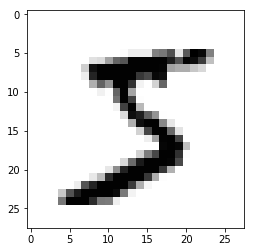

In [205]:
# 종속변수, 독립변수 추출
X = np.array(df.drop(0,axis=1))
Y = np.array(df[:][0])

# 28*28 이미지 재배치
X = np.reshape(X,(100, 28, 28))

# 이미지를 보여준다.
def ShowMe(Xi, Yi, i):
    plt.imshow(1.0 - Xi[i], cmap='gray')
    print(Yi[i])
    plt.show()
    
ShowMe(X, Y, 0)

In [173]:
def reducedPCA(X,nPC):
    pca = PCA(n_components = nPC)
    X_pca = pca.fit_transform(X)
    return pca.inverse_transform(X_pca)

N# of PCs = 23


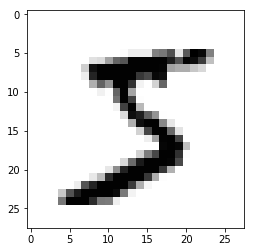

N# of PCs = 10


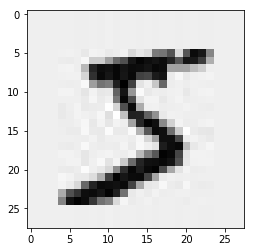

N# of PCs = 5


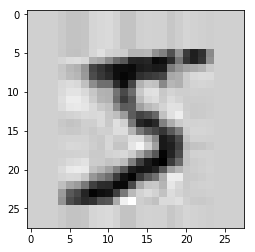

N# of PCs = 3


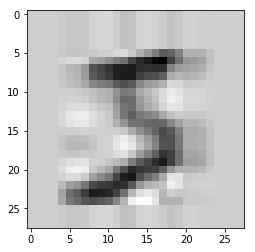

N# of PCs = 1


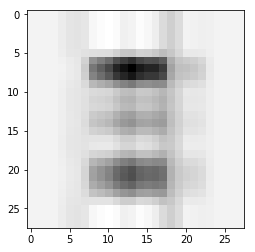

In [175]:
# 10정도면 판별 가능한 것으로 보아 축소하겠음.
for nPC in [23, 10, 5, 3, 1]:
    Z = reducedPCA(X2[0],nPC)
    print( "N# of PCs = " + str(nPC))
    ShowMe(Z)

In [191]:
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, test_size=0.5, random_state=3)

NameError: name 'Y2' is not defined

In [188]:
depth_grid = np.arange(10,31,2)
print(depth_grid)
parameters = {'max_depth':depth_grid}

[10 12 14 16 18 20 22 24 26 28 30]


In [189]:
# CV(Cross Validation) 교차검증
gridCV = GridSearchCV(DecisionTreeClassifier(), parameters, cv=10)
gridCV.fit(X_train, Y_train);
best_depth = gridCV.best_params_['max_depth']

ValueError: n_splits=10 cannot be greater than the number of members in each class.

In [ ]:
print("Tree best depth : " + str(best_depth))

In [ ]:
DTC_best = DecisionTreeClassifier(max_depth=best_depth)
DTC_best.fit(X_train, Y_train);
Y_pred = DTC_best.predict(X_test)
print( "Tree best accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

#### Random Forest 적용 (교차검증 최적화 포함):

Tree 하고는 스텝에서 조금 차이가 있음:

In [190]:
estimator_grid = np.arange(1, 30, 5)
depth_grid = np.arange(1, 10, 2)
parameters = {'n_estimators': estimator_grid, 'max_depth': depth_grid}
gridCV = GridSearchCV(RandomForestClassifier(), param_grid=parameters, cv=10)
gridCV.fit(X_train, Y_train)
best_n_estim = gridCV.best_params_['n_estimators']
best_depth = gridCV.best_params_['max_depth']

ValueError: n_splits=10 cannot be greater than the number of members in each class.

In [ ]:
print("Random Forest best n estimator : " + str(best_n_estim))
print("Random Forest best depth : " + str(best_depth))

In [ ]:
RF_best = RandomForestClassifier(max_depth=best_depth,n_estimators=best_n_estim,random_state=3)
RF_best.fit(X_train, Y_train);
Y_pred = RF_best.predict(X_test)
print( "Random Forest best accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))